<a href="https://colab.research.google.com/github/deguc/Shannon/blob/main/401_Bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

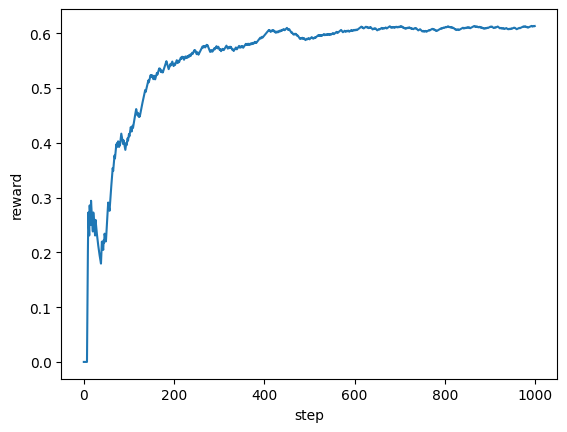

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:

    def __init__(self,arms):

        self.rates = np.random.rand(arms)

    def down(self,arm):

        return (self.rates[arm] >np.random.rand()) * 1.0

class Agent:

    def __init__(self,arms):

        self.Q = np.zeros(arms)
        self.n = np.zeros(arms)

    def choice(self):

        if np.random.rand() < 0.1:
            return np.random.randint(len(self.Q))
        else:
            return np.argmax(self.Q)

    def update(self,a,r):

        self.n[a] += 1
        self.Q[a] += (r-self.Q[a]) / self.n[a]



np.set_printoptions(precision=2,suppress=True)

arms = 10
bandit = Bandit(arms)
agent = Agent(arms)

steps = 1000
reward = []
total = 0

for step in range(steps):

    a = agent.choice()
    r = bandit.down(a)
    agent.update(a,r)

    total += r
    reward += [total / (step+1)]

plt.plot(reward)
plt.xlabel('step')
plt.ylabel('reward')
plt.show()